# Assignment: Data Wrangling and Exploratory Data Analysis
## Eric Nguyen - wvu9cs F23
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [1]:
# Clone the data from the GitHub Repo
! git clone https://github.com/eric-nguyen13/DS3001-WranglingEDA

fatal: destination path 'DS3001-WranglingEDA' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q1.** Answers to Question 1 above are listed here:
1. In her abstract, Hadley Wickham reiterates the importance of data cleaning and raises the concern for a lack of research in this area. This paper is about data cleaning and her framework RStudio, which is aimed towards tidying messy datasets.


2. The 'tidy data standard' is what Wickham describes as a way "to facilitate initial exploration and analysis of data, and to simplify to simplify the development of data analysis tools that work well together". Specifically, this means that the standard's purpose is to be a set of prinicples that scientists should follow in order to make their data cleaning process much easier and efficient.


3. "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." This sentence suggests that there are aspects of each datset that makes them similar to all other datasets, yet there are other aspects that make them completely different. For the former, all tidy datasets are similar in that each variable forms a column, each obsevation forms a row, and eac obsevational unit forms a table. However, each dataset is different in the process of how you clean them; this can range from imputing values, to checking outliers, to date parsing.\
"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." This sentence means that when reviewing datasets, it often easy to recognize what an observation and variable is in that context. However, when you are trying to define observations and variables in a new context, it's difficult to distinguish new variables from observations. In short, it's much harder to come up what variables you should record in the dataset, and thus it's much harder to define an observation.



4. In section 2.2, Wickham defines the following:\
Values: values are what datasets are composed of and usually are numbers (quantitative) or strings (qualitative). They are organized by observation and variables.\
Variables: a variable contains all values that measure the same underlying attribute across units.\
Observations: an observation contains all values measured on the same unit across attributes.


5. Tidy Data: the standard way of mappign the meaning of a dataset to its structure. Tidy data typically has each variable forming its own column, each observation forming its own row, and each observation unit forming a table.


6. The five most common problems with messy datasets include:\
a. Column headers are values, not variable names.\
b. Multiple variables are stored in one column.\
c. Variables are stored in both rows and colums.\
d. Multiple types of observational units are stored in the same table.\
e. A single observational unit is stored in multiple tables.\
In table 4, the data are messy because each row is not an observation. To fix this, the table should be melted (turn the columns into rows). Melting is parameterised by a list of columns that are already variables.


7. Table 11 is messy because each row has more than one observation (it contains columns for all days in a month d1-d31). In adddition, the element column contains tmax and tmin, which are variables as well.\
Table 12 is 'molten' because each row represents the meteorological measurements for a single day (each row is one observation), yet the element column still contains tmax and tmin. It is tidier than table 11.


8. The chicken and the egg problem is if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This raises the concern whether tidy tools will work with messy data, since tidy tools are only compatible with tidy data (and vice versa).\
Wickham hopes that her tidy data framework doesn't fall into this trap; she believes that others should build upon her framework and continue to improve strategies surrounding tidying data.

**Q2.** This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

* After analyzing this variable, I discovered that 30,748 observations of prices. Based on the code below, the dataset has 0 missing values in the Price feature. However, the Price feature still needed to be clean; when prices exceed 999, the dataset includes a comma to indicate the thousands place. Because of this, I went back through and cleaned this to only have numeric data. See the comments below for more details.

In [2]:
# Import the numpy and pandas packages into your workspace
import numpy as np
import pandas as pd

# Save the dataset into the df variable and print out the first 5 entries
df = pd.read_csv('./DS3001-WranglingEDA/data/airbnb_hw.csv',low_memory=False)

In [3]:
# BEFORE CLEANING
# Check if the data type of 'Price' is object (string)
if df['Price'].dtype == 'object':
    print("The dataset contains categorical variables.")
else:
    print("The dataset does not contain categorical variables.")

# Check if the 'Price' column contains any missing data
if df['Price'].isna().any():
    print("\nThe dataset contains missing values in the 'Price' column.\n")
else:
    print("\nThe dataset does not contain missing values in the 'Price' column.\n")

# Discover what type Price column is - <float>
print("The Price feature is of type" , df['Price'].dtype , ".")

The dataset contains categorical variables.

The dataset does not contain missing values in the 'Price' column.

The Price feature is of type object .


In [4]:
# Remove commas from the "Price" column and convert it to numeric float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [5]:
# AFTER CLEANING
# Check if the data type of 'Price' is object (string)
if df['Price'].dtype == 'object':
    print("The dataset contains categorical variables.")
else:
    print("The dataset does not contain categorical variables.")

# Check if the 'Price' column contains any missing data
if df['Price'].isna().any():
    print("\nThe dataset contains missing values in the 'Price' column.\n")
else:
    print("\nThe dataset does not contain missing values in the 'Price' column.\n")

# Discover what type Price column is - <float>
print("The Price feature is of type" , df['Price'].dtype, ".")

The dataset does not contain categorical variables.

The dataset does not contain missing values in the 'Price' column.

The Price feature is of type float64 .


2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
* After analyzing this dataset, I realized there were many categories under the 'Type' column. Many of these were redundant, which suggested to me that the best way to data clean this was to combine similar/same categories into one (like we discussed in class). By doing this, there are less columns that are redundant, making it much easier to understand the data. See comments below for more details.

In [6]:
# Save the dataset into the df2 variable and print out the first 5 entries
df2 = pd.read_csv('./DS3001-WranglingEDA/data/sharks.csv',low_memory=False)
print(df2['Type'].unique())

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']


In [7]:
# BEFORE CLEANING
# Check if the 'Type' column contains any missing data
if df2['Type'].isna().any():
    print("\nThe dataset contains missing values in the 'Type' column.\n")
else:
    print("\nThe dataset does not contain missing values in the 'Type' column.\n")

# Discover what type 'Type' column is - <float>
print("The Type feature is of type" , df2['Type'].dtype , ".")


The dataset contains missing values in the 'Type' column.

The Type feature is of type object .


In [8]:
# CLEANING
# Watercraft, boat, boating, boatomg are all similar/same categories. They've been converted to the same thing here to be tidier.
df2['Type'] = df2['Type'].str.replace('Watercrafting', 'Watercraft')
df2['Type'] = df2['Type'].str.replace('Watercraftomg', 'Watercraft')
df2['Type'] = df2['Type'].str.replace('Boat', 'Watercraft')
df2['Type'] = df2['Type'].str.replace('Boating', 'Watercraft')
df2['Type'] = df2['Type'].str.replace('Boatomg', 'Watercraft')

# Unconfirmed, questionable, unverified, under investigation, nan are all similar/same categories. They've been converted to the samet ing here to be tidier.
df2['Type'] = df2['Type'].str.replace('Questionable', 'Unconfirmed')
df2['Type'] = df2['Type'].str.replace('Unverified', 'Unconfirmed')
df2['Type'] = df2['Type'].str.replace('Under investigation', 'Unconfirmed')
df2['Type'].fillna('Unconfirmed', inplace=True)

print(df2['Type'].unique())

['Unprovoked' 'Provoked' 'Unconfirmed' 'Watercraft' 'Invalid'
 'Watercrafting' 'Sea Disaster' 'Watercraftomg']


In [9]:
# AFTER CLEANING
# Check if the 'Type' column contains any missing data
if df2['Type'].isna().any():
    print("\nThe dataset contains missing values in the 'Type' column.\n")
else:
    print("\nThe dataset does not contain missing values in the 'Type' column.\n")

# Discover what type 'Type' column is - <object>
print("The Type feature is of type" , df2['Type'].dtype , ".")


The dataset does not contain missing values in the 'Type' column.

The Type feature is of type object .


3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
* After analysis, I discovered that the 'WhetherDefendantWasReleasedPretrial' column had three categories: 0, 1, and 9. According to the codebook, 0 means 'not released', 1 means 'released', and 9 means 'unclear'. The 9s are not data and actually mess with the binary 0 and 1 values. It is best to convert them to np.nan so that we do not need to remember that 9s are missing. This gives me the option to impute the values later. See the comments for more details

In [10]:
df3 = pd.read_csv('October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv',low_memory=False)
print(df3['WhetherDefendantWasReleasedPretrial'].unique())

[9 0 1]


In [11]:
# Check if the data type of 'Price' is object (string)
if df3['WhetherDefendantWasReleasedPretrial'].dtype == 'object':
    print("The dataset contains categorical variables.")
else:
    print("The dataset does not contain categorical variables.")

# Check if the 'Price' column contains any missing data
if df3['WhetherDefendantWasReleasedPretrial'].isna().any():
    print("\nThe dataset contains missing values in the 'WhetherDefendantWasReleasedPretrial' column.\n")
else:
    print("\nThe dataset does not contain missing values in the 'WhetherDefendantWasReleasedPretrial' column.\n")

# Discover what type Price column is - <float>
print("The Price feature is of type" , df3['WhetherDefendantWasReleasedPretrial'].dtype , ".")

The dataset does not contain categorical variables.

The dataset does not contain missing values in the 'WhetherDefendantWasReleasedPretrial' column.

The Price feature is of type int64 .


In [12]:
# Rename the column
df3.rename(columns={'WhetherDefendantWasReleasedPretrial': 'ReleasedPretrial'}, inplace=True)

# Convert observations where ReleasedPretrial has a value of 9 to np.nan
df3['ReleasedPretrial'].replace(9, np.nan, inplace=True)

print(df3['ReleasedPretrial'].unique())

[nan  0.  1.]


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)
* After analysis, these columns are quite messy. According to the codebook, a SentenceType of 4 indicates that a sentence is not applicable. Therefore when cleaning, I replaced type 4 to type 0. I also had to check whether the ImposedSentence for SentenceType 0 exceeded 0. I manually set it back to 0 to align with the code book.\
In addition, there were ImposedSentence values greater than 12 for type 1. This is incorrect based on the codebook, so I manually set any value greater to 12 to the maximum ImposedSentence outlined by the codebook.\
Lastly, I made the SentenceType 9's ImposedSentence into np.nan because they were missing values. By doing this, it indicates they are missing rather than messing the the data's statistics.

In [13]:
df3.rename(columns={'ImposedSentenceAllChargeInContactEvent': 'ImposedSentence'}, inplace=True)
df3.rename(columns={'SentenceTypeAllChargesAtConvictionInContactEvent': 'SentenceType'}, inplace=True)

In [14]:
# ANALYSIS BEFORE CLEANING
# Cross tabulate ImposedSentence and SentenceType
pd.crosstab(df3['ImposedSentence'], df3['SentenceType'])

SentenceType,0,1,2,4,9
ImposedSentence,,,,,
,0,0,0,8779,274
.0328542094455852,0,6,0,0,0
.0657084188911704,3,21,0,0,0
.0985626283367557,2,6,0,0,0
.131416837782341,4,10,0,0,0
...,...,...,...,...,...
98,0,0,1,0,0
98.95687885,0,0,1,0,0
99,0,1,0,0,0


In [15]:
# CLEANING
# Replace empty obvservations with -1. I do this to temporarily coerce the column into numerical
# In order to evalute operators ( > 12) on the column. See comments below.
df3['ImposedSentence'].replace(' ', -1, inplace=True)

df3['SentenceType'] = df3['SentenceType'].replace(4, 0)

# If sentence type is 0, set the imposed sentence to 0 per the Codebook.
df3.loc[df3['SentenceType'] == 0, 'ImposedSentence'] = 0

# Cast the ImposedSentence column to numeric in order to evalute the following code line.
df3['ImposedSentence'] = pd.to_numeric(df3['ImposedSentence'], errors='coerce')

# If SentenceType is 1 and the ImposedSentence is greater than 12 years, set the ImposedSentence
# To a maximum of 12 years per the codebook.
df3.loc[(df3['SentenceType'] == 1) & (df3['ImposedSentence'] > 12), 'ImposedSentence'] = 12

# Revert the -1 replacement and enter them as np.nan to indicate that they are missing values
df3['ImposedSentence'].replace(-1, np.nan, inplace=True)

# If SentenceType is 9, then set ImposedSentence to np.nan per the code.book
df3.loc[df3['SentenceType'] == 9, 'ImposedSentence'] = np.nan

In [16]:
# Analyze the cleaned data. It matches the codebook now!
df3[['SentenceType','ImposedSentence']].head(50)

,SentenceType,ImposedSentence
0,9,NaN
1,0,0.000000
2,1,12.000000
3,1,0.985626
4,0,0.000000
5,0,0.000000
6,1,12.000000
7,0,0.000000
8,1,12.000000
9,1,12.000000


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [17]:
# Load the data with pandas
df4 = pd.read_csv('./DS3001-WranglingEDA/data/college_completion.csv',low_memory=False)

In [18]:
# What are are the dimensions of the data?  How many observations are there?
print(df4.shape)
print(f"The dataset has {df4.shape[0]} rows/observations.")
print(f"The dataset has {df4.shape[1]} columns/variables.\n")

# What are the variables included?
print(df4.columns)

# Use .head() to examine the first few rows of data
df4.head()

(3798, 63)
The dataset has 3798 rows/observations.
The dataset has 63 columns/variables.

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewher

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [19]:
# Cross tabulate control and level. Describe the patterns you see. (See text cell below)
pd.crosstab(df4['control'], df4['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Based on this table, the majority of 4-year colleges are Private not-for-profit and the majority of public colleges are at the 2 year level. Private for-profit schools are close to 50/50 between the 2 and 4 year level, whereas the Private not-for-profit is skewed in favor of 4 year

<Axes: >

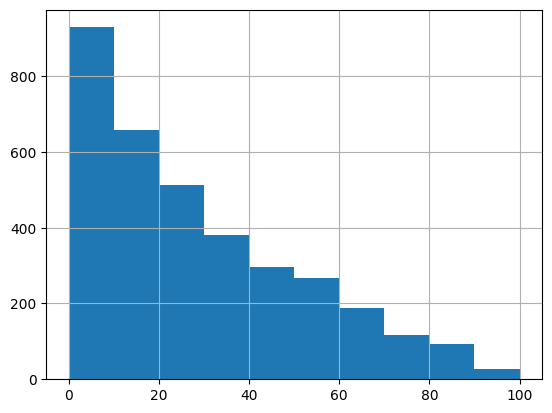

In [20]:
# For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
var = 'grad_100_value'
df4[var].hist()

<Axes: xlabel='grad_100_value', ylabel='Density'>

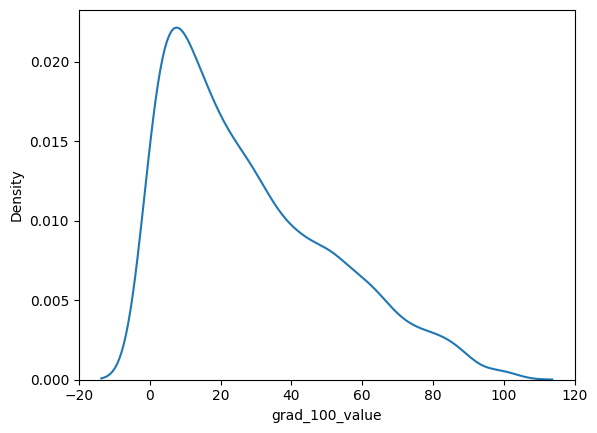

In [21]:
# For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
import seaborn as sns
sns.kdeplot(df4[var])


<Axes: xlabel='grad_100_value'>

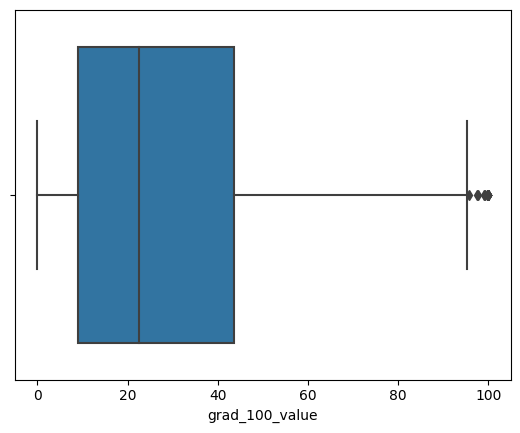

In [22]:
# For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
sns.boxplot(data=df4, x=var)

In [23]:
# For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
df4[var].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

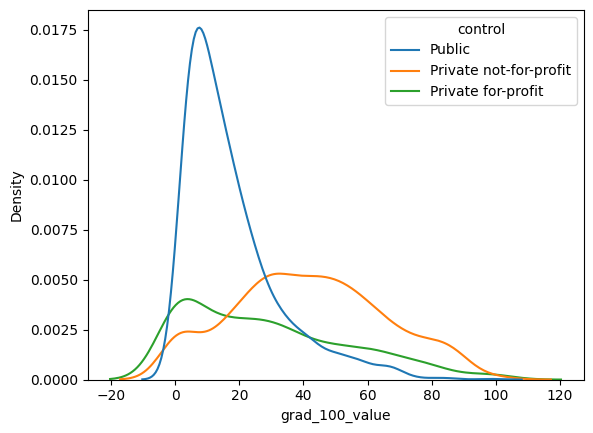

In [24]:
# For grad_100_value, create a grouped kernel density plot by control and by level.
sns.kdeplot(data=df4, x="grad_100_value", hue="control")


<Axes: xlabel='grad_100_value', ylabel='Density'>

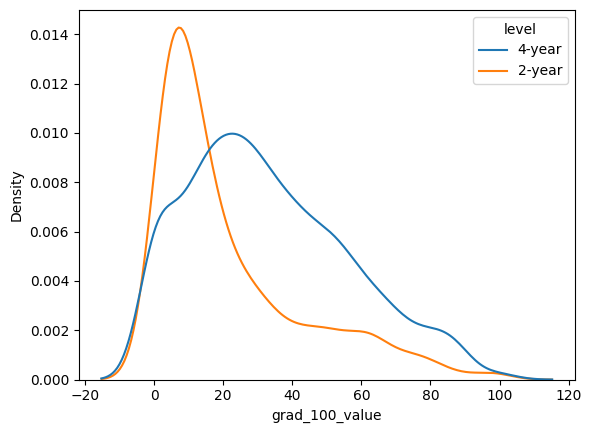

In [25]:
# For grad_100_value, create a grouped kernel density plot by control and by level. #doube check
sns.kdeplot(data=df4, x="grad_100_value", hue="level")


Describe what you see.

* Based on the grouped kernel density plot, both 4-year and 2-year schools have similar distributions, as evidenced by the significant overlap between the two graphs. It seems that 4-year schools have a better graduation rate based on the peak at a higher grad_100_value value.

In [26]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates? Set the style of the plot

# Grouped by Level
df4.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

As evidenced by this table, 4-year institutions have a better graduation rate. Specifically, 4-year institutions on average have a 33% graduation rate whereas 2-year have 21%. In addition, the other statistics of interest (25%, 50%, etc.) all have higher percentages.

In [27]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates? Set the style of the plot

# Grouped by Control
df4.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

As evidenced by this table, Private not-for-profit has the best graduation rate at 41% on average. This is folow by Private for-profit at 29%, and Public institutions in last at 17%. Private not-for-profit generally has the highest statistics in all categories, whereas Private for-profit is close with public but has higher statistics in some categories.

<Axes: xlabel='grad_100_value', ylabel='Density'>

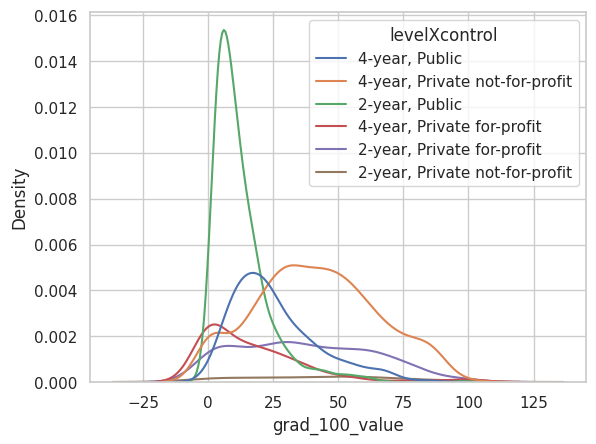

In [28]:
# Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control.
# Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

# Create a new variable 'levelXcontrol' by interacting 'level' and 'control'
df4['levelXcontrol'] = df4['level'] + ', ' + df4['control']

# Set the style of the plot
sns.set(style="whitegrid")

# Create a grouped kernel density plot by 'levelXcontrol'
sns.kdeplot(data=df4, x="grad_100_value", hue="levelXcontrol")

What appears to have the best graduation rate?\
Based on this chart, 4-year Private not-for-profit has the best graduation rate. You can see that it has the best/widest distribution at a high percentage. Contrastingly, it seems that 2-year public has the worst graduation rate as evidenced by the high density at a low graduation rate. Because of these opposite trends, it makes sense that y-year private not-for-profit is the best based on the shape of its plot.

<ipython-input-29-72efc3b4e736>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df4, x="aid_value", shade=True)


<Axes: xlabel='aid_value', ylabel='Density'>

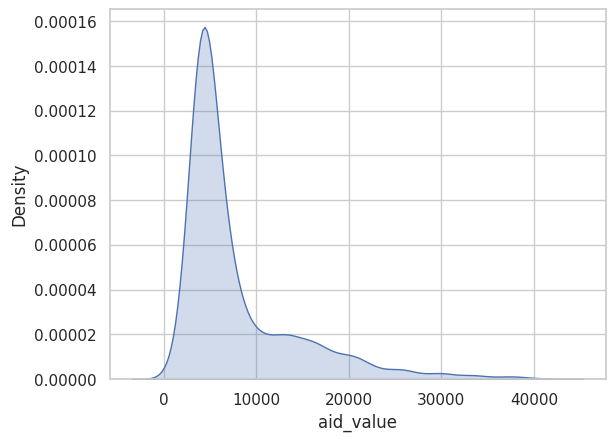

In [29]:
# Make a kernel density plot of aid_value. Notice that your graph is "bi-modal", having two little peaks that represent
# locally most common values. Now group your graph by level and control.

sns.kdeplot(data=df4, x="aid_value", shade=True)

<Axes: xlabel='aid_value', ylabel='Density'>

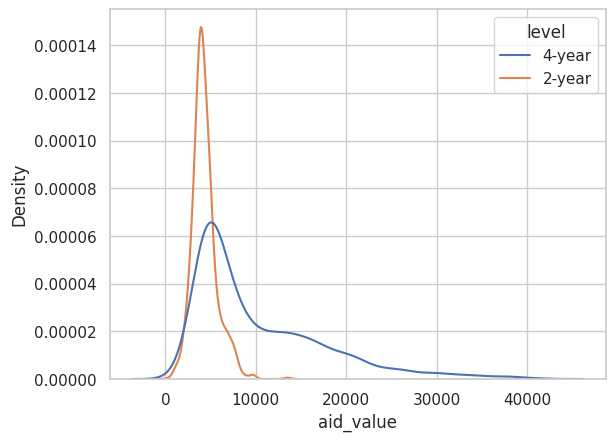

In [30]:
# Grouped Kernel Density Plot (level)
sns.kdeplot(data=df4, x='aid_value', hue = 'level')

<Axes: xlabel='aid_value', ylabel='Density'>

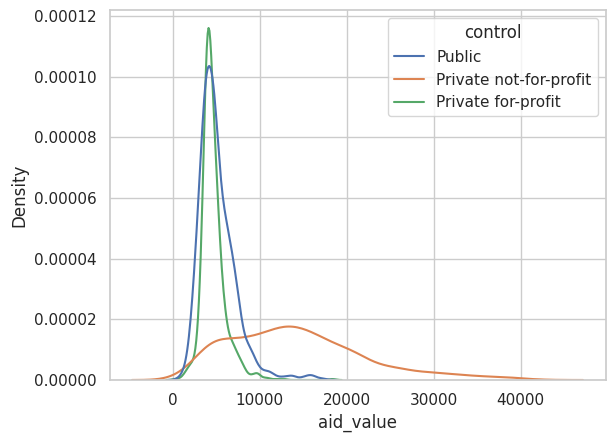

In [31]:
# Grouped Kernel Density Plot (Control)
sns.kdeplot(data=df4, x='aid_value', hue = 'control')

In [32]:
# Grouped Statistical Description (Level)
df4.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [33]:
# Grouped Statistical Description (Control)
df4.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

What explains the bi-modal nature of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
* The bi-modal nature of the graphs can be explained by the institution types and the levels. Private for-profit has a different rate of aid than Privte not-for-profit and Public since it is being funded by different people. Seemingly, students who can afford private for-profit on average do not need as much aid whereas students who attend Private not-for-profit or Public will require more aid.

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

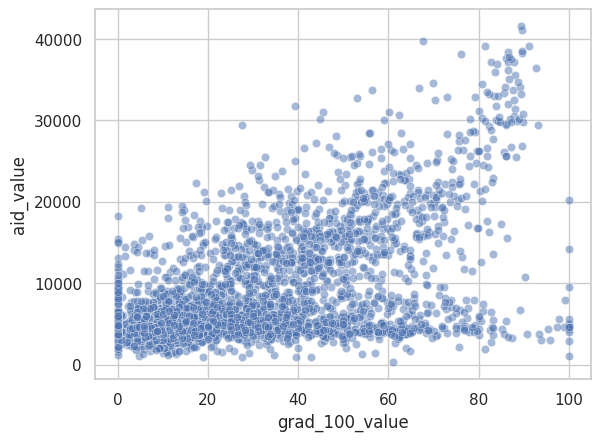

In [34]:
# Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control.
# Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

sns.scatterplot(data=df4, x="grad_100_value", y="aid_value", alpha=0.5)

There seems to be a concentration of values in the bottom left corner, indicating that institutions with low graduation rates give out little aid. Although this is certainly not definitive, as there are outliers that prove otherwise. Overall, there seems to be a linear relationship where the higher the graduation rate is, the more aid is given out by the institution.

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

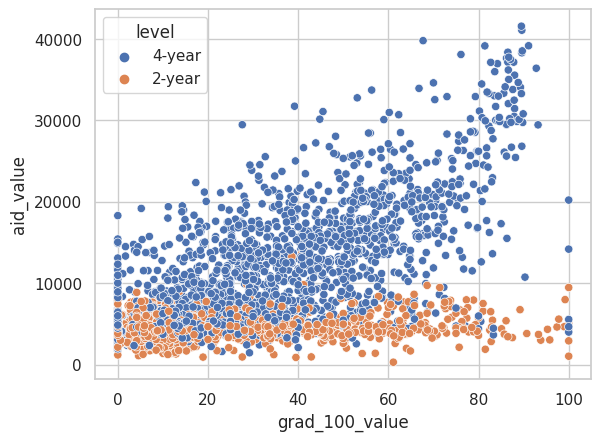

In [35]:
sns.scatterplot(data=df4, x="grad_100_value", y="aid_value", hue='level')

After analyzing this graph, it seems that 4-year students benefit the most from aid since there is an increase in aid value as the graduation rate increases. This is not consistent with 2 year institutions, however, suggesting that the correlation between these two variables is weaker than it is in 4-year.

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

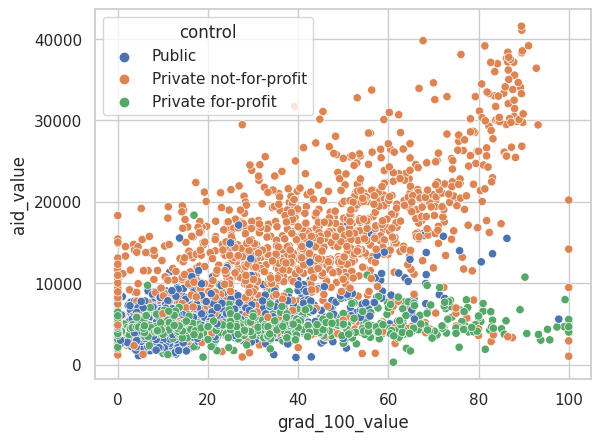

In [36]:
# Grouped Scatterplot of aid_value (Control)
sns.scatterplot(data=df4, x='grad_100_value', y='aid_value', hue='control')

After analyzing this graph, it seems that Private not-for-profit institutions have a strong correlation with graduation rate and aid value. Other institutions such as Public and Private for-profit don't seem to have as strong of correlation, suggesting that it doesn't play an important factor in their graduation rates.

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.